<h1 style="text-align:center;">Gene Classification Machine Learning</h1>
<p align="center">
  <img src="https://www.pennmedicine.org/news/-/media/images/pr%20news/news/2021/october/dna.ashx?la=en" width="700" height="300">
</p>

# Machine Learning for Cancer Prediction Using RNA-seq Data

## Project Overview

In this project, we delve into the domain of bioinformatics with the goal of predicting cancer types using machine learning techniques. The core of our analysis is an RNA-seq Gene Expression dataset, which plays a pivotal role in our predictive modeling.

### Dataset Description

The dataset underpinning our project consists of RNA-seq Gene Expression data across various cancer types. RNA sequencing (RNA-seq) provides us with a comprehensive view of the transcriptome, offering insights into the quantity and sequences of RNA in a sample. In the context of cancer research, analyzing these expression profiles can reveal patterns that distinguish between different types of cancers, thus aiding in their identification and characterization.

**Structure**: The dataset is structured with samples as rows and gene count values as columns. Each row represents a cancer sample, encapsulating the expression levels of thousands of genes. The columns, apart from the last one, correspond to these genes and their respective count values within each sample.
  
**Target Variable**: The last column in our dataset is of particular interest as it contains the labels for our predictive model – the cancer categories. This categorical variable will serve as the target for our machine learning algorithms, guiding them in learning the complex relationships between gene expressions and cancer types.

- **KIRC**: Kidney Renal Clear Cell Carcinoma. This is a type of kidney cancer that originates in the lining of the proximal convoluted tubule, a part of the very small tubes in the kidney that transport primary urine.

- **BRCA**: Breast Invasive Carcinoma. This type represents cancers that have spread from the original site in the breast to surrounding tissues. It's the most common type of breast cancer.

- **COAD**: Colon Adenocarcinoma. A cancer of the colon which is characterized by a malignant growth formed from the glandular structures in the epithelial tissue.

- **LUAD**: Lung Adenocarcinoma. This type is a form of non-small cell lung cancer, which tends to grow slower than other lung cancers. It is found in the outer parts of the lung and is the most common type of lung cancer among non-smokers.

- **PRAD**: Prostate Adenocarcinoma. This cancer develops in the prostate gland and is the most common form of prostate cancer. It begins in the gland cells of the prostate.

### Objective

Our primary objective is to build and evaluate machine learning models that can accurately predict the type of cancer based on the gene expression profiles provided in the dataset. By achieving this, we aim to contribute to the broader efforts in cancer diagnosis and treatment, potentially offering insights that could guide personalized medicine approaches.

### Approach

To accomplish our goal, we will:
- Perform an exploratory data analysis (EDA) to understand the distribution of variables, the structure of our dataset, and any patterns or anomalies present.
- Preprocess the data to make it suitable for machine learning models, including normalization, handling missing values, and feature selection.
- Train various machine learning models, comparing their performance to identify the most effective approach for cancer type prediction.
- Evaluate the models using appropriate metrics to assess their accuracy and robustness.

By the end of this project, we hope to have a robust predictive model that showcases the power of machine learning in the field of bioinformatics, specifically for cancer type prediction through RNA-seq gene expression data analysis.


1. [Data Overview](#data-overview)
2. [Importing Libraries](#importing-libraries)
3. [Data Cleaning & Preprocessing](#data-cleaning-and-preprocessing)
4. [Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda)
    - [Univariate Analysis](#univariate-analysis)
    - [Bivariate Analysis](#bivariate-analysis)
    - [Multivariate Analysis](#multivariate-analysis)
5. [Data Encoding](#data-encoding)
6. [Data Scaling](#data-scaling)
7. [Data Modeling](#data-modeling)
8. [Model Evaluation](#model-evaluation)
9. [Pipeline](#pipeline)
10. [Deployment](#deployment)

<p style = "color: #00FFAB;
            font: bold 22px tahoma;
            background-color: #111;
            padding: 18px;
            border: 3px solid lightgreen;
            border-radius: 8px;
            text-align:center;"> 
    1] 🤗 Adding libraries
</p>

In [2]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import plotly.graph_objects as go
import plotly.figure_factory as ff
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_curve, roc_auc_score, precision_recall_curve

<p style = "color: #00FFAB;
            font: bold 22px tahoma;
            background-color: #111;
            padding: 18px;
            border: 3px solid lightgreen;
            border-radius: 8px;
            text-align:center;"> 
    2]  Reading the data
</p>

In [3]:
df = pd.read_csv('cancer_gene_expression.csv')
df.head()

,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,...,gene_7992,gene_7993,gene_7994,gene_7995,gene_7996,gene_7997,gene_7998,gene_7999,gene_8000,Cancer_Type
0,0.0,0.0,0.0,2.088413,0.0,0.0,0.0,0.0,0.550605,2.815760,...,11.558803,8.881802,6.014840,6.643534,11.740624,7.065012,9.932659,6.928584,2.088413,KIRC
1,0.0,0.0,0.0,3.205955,0.0,0.0,0.0,0.0,0.425244,2.354396,...,11.062829,9.032864,5.054193,6.432320,12.104985,7.300746,9.872796,5.039231,2.448002,KIRC
2,0.0,0.0,0.0,4.746646,0.0,0.0,0.0,0.0,2.639417,1.657091,...,12.497640,7.198160,0.943434,7.371690,11.202356,8.426588,11.176890,3.119738,4.433988,BRCA
3,0.0,0.0,0.0,1.173191,0.0,0.0,0.0,0.0,1.527371,2.732899,...,11.261713,8.725676,6.300418,6.036451,11.732303,7.559469,9.596453,2.863046,3.380342,KIRC
4,0.0,0.0,0.0,1.366532,0.0,0.0,0.0,0.0,0.000000,3.388355,...,12.241965,7.685204,5.142948,6.355788,11.493950,8.139444,10.189256,6.544487,0.839395,COAD


In [5]:
df.shape

(801, 8001)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Columns: 8001 entries, gene_1 to Cancer_Type
dtypes: float64(8000), object(1)
memory usage: 48.9+ MB


In [7]:
df.describe().T # to check for any missing values

,count,mean,std,min,25%,50%,75%,max
gene_1,801.0,0.026642,0.136850,0.000000,0.000000,0.000000,0.000000,1.482332
gene_2,801.0,0.231049,0.656692,0.000000,0.000000,0.000000,0.000000,6.575004
gene_3,801.0,0.010844,0.153859,0.000000,0.000000,0.000000,0.000000,3.778061
gene_4,801.0,2.405459,0.797236,0.000000,1.898595,2.358284,2.929355,4.746646
gene_5,801.0,0.005799,0.052265,0.000000,0.000000,0.000000,0.000000,0.570754
...,...,...,...,...,...,...,...,...
gene_7996,801.0,11.567069,0.332096,10.245493,11.370420,11.579127,11.765257,12.730315
gene_7997,801.0,7.644004,0.646763,5.833191,7.247358,7.682742,8.070051,10.564759
gene_7998,801.0,10.299866,0.443605,8.850653,10.036599,10.260555,10.515887,13.031698
gene_7999,801.0,6.212981,1.425559,0.713256,5.388155,6.219147,7.100357,11.281391


<p style = "color: #00FFAB;
            font: bold 22px tahoma;
            background-color: #111;
            padding: 18px;
            border: 3px solid lightgreen;
            border-radius: 8px;
            text-align:center;"> 
    3]  Data Cleaning & Preparation
</p>

In [8]:
df.duplicated().sum() # to check for duplicate rows

0

In [9]:
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()
    
    # Percentage of missing values
    mis_val_percent =  df.isnull().sum() / len(df) * 100
    
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    
    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
    
    # Print some summary information
    print ("The dataset has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")
    
    # Return the dataframe with missing information
    return mis_val_table_ren_columns
missing_values_table(df)

The dataset has 8001 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [11]:
# Let's check how many unique values are there in cancer_type column
df['Cancer_Type'].value_counts()

Cancer_Type
BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: count, dtype: int64

<p style = "color: #00FFAB;
            font: bold 22px tahoma;
            background-color: #111;
            padding: 18px;
            border: 3px solid lightgreen;
            border-radius: 8px;
            text-align:center;"> 
    4]  EDA (Exploratory Data Analysis)
</p>

In [18]:
# What the most cancer type in the dataset
px.histogram(df, x='Cancer_Type', title='Cancer Type Distribution',template= "plotly_dark", text_auto=True)

In [15]:
px.pie(df, names='Cancer_Type', title='Cancer Type Distribution',template= "plotly_dark")

# Cancer Type Distribution Explained

The bar chart presents the distribution of different types of cancer in a given dataset. Here's a brief overview of each type:

- **KIRC**: Kidney Renal Clear Cell Carcinoma. This is a type of kidney cancer that originates in the lining of the proximal convoluted tubule, a part of the very small tubes in the kidney that transport primary urine.

- **BRCA**: Breast Invasive Carcinoma. This type represents cancers that have spread from the original site in the breast to surrounding tissues. It's the most common type of breast cancer.

- **COAD**: Colon Adenocarcinoma. A cancer of the colon which is characterized by a malignant growth formed from the glandular structures in the epithelial tissue.

- **LUAD**: Lung Adenocarcinoma. This type is a form of non-small cell lung cancer, which tends to grow slower than other lung cancers. It is found in the outer parts of the lung and is the most common type of lung cancer among non-smokers.

- **PRAD**: Prostate Adenocarcinoma. This cancer develops in the prostate gland and is the most common form of prostate cancer. It begins in the gland cells of the prostate.

The counts on the y-axis represent the number of cases for each cancer type in the dataset. From this visualization, we can observe that BRCA has the highest count, indicating that it is the most common cancer type in this dataset, followed by LUAD and PRAD which have a similar distribution, and KIRC and COAD have fewer cases in comparison.

<p style = "color: #00FFAB;
            font: bold 22px tahoma;
            background-color: #111;
            padding: 18px;
            border: 3px solid lightgreen;
            border-radius: 8px;
            text-align:center;"> 
    5]  Feature Selection & Building the ML models
</p>

In [16]:
x = df.drop('Cancer_Type', axis=1)
y = df['Cancer_Type']
print(x.shape)

(801, 8000)


In [17]:
y.shape

(801,)

In [19]:
# Label encoding the target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
labels = le.classes_
classes = np.unique(y)
print(labels)
print(classes)

['BRCA' 'COAD' 'KIRC' 'LUAD' 'PRAD']
[0 1 2 3 4]


In [20]:
# Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [21]:
df.iloc[:, :10].describe()

,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.026642,0.231049,0.010844,2.405459,0.005799,0.065640,0.022036,0.028394,0.703998,1.916364
std,0.136850,0.656692,0.153859,0.797236,0.052265,0.213557,0.148917,0.161606,0.779321,0.877010
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.898595,0.000000,0.000000,0.000000,0.000000,0.000000,1.357214
50%,0.000000,0.000000,0.000000,2.358284,0.000000,0.000000,0.000000,0.000000,0.518031,1.877862
75%,0.000000,0.000000,0.000000,2.929355,0.000000,0.000000,0.000000,0.000000,1.123931,2.486792
max,1.482332,6.575004,3.778061,4.746646,0.570754,1.866275,2.169925,2.375957,4.541670,4.932231


In [22]:
# Scaling the features using Min Max Scaler as the data ranges between 0(min) and max value
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## Mutual Information for Feature Selection in Classification

Mutual Information (MI) measures the amount of information one variable provides about another. It's particularly useful in feature selection for classification problems because it can quantify the relevance of each feature to the target variable.

### Steps for Using MI in Feature Selection:

1. **Preprocess Data**: Clean and preprocess data. Mutual Information can handle both continuous and categorical data, but ensure to handle missing values and scale data if necessary.

2. **Calculate MI Scores**: Utilize `mutual_info_classif` from `scikit-learn` to compute MI scores between each feature and the target variable.
    ```python
    from sklearn.feature_selection import mutual_info_classif
    mi_scores = mutual_info_classif(X, y)
    ```
   - `X`: Feature matrix.
   - `y`: Target output vector.

3. **Select Features**: Select top features based on MI scores. The selection of how many features to keep can be based on model performance.

4. **Evaluate Model**: Train your model using the selected features and evaluate its performance. Compare the performance with and without feature selection to assess its impact.

### Advantages:

- Captures any kind of relationship between feature and target.
- Useful for reducing overfitting and improving model interpretability and performance.

### Considerations:

- High MI scores do not imply causality.
- Does not account for feature interactions, which may be important in some models.


In [23]:
from sklearn.feature_selection import mutual_info_classif

In [24]:
MI = mutual_info_classif(x_train_scaled, y_train)

In [25]:
MI.shape

(8000,)

In [26]:
MI[0:5]

array([0.        , 0.02063908, 0.01491625, 0.05180623, 0.06452043])

In [27]:
features  = x_train.columns
features.shape

(8000,)

In [28]:
features[0:5]

Index(['gene_1', 'gene_2', 'gene_3', 'gene_4', 'gene_5'], dtype='object')

In [29]:
# Select the top n features
n_features = 300
selected_scores_indices = np.argsort(MI)[::-1][:n_features]

In [30]:
x_train_selected = x_train_scaled[:, selected_scores_indices]
x_test_selected = x_test_scaled[:, selected_scores_indices]

In [32]:
x_train_selected.shape  , x_test_selected.shape

((640, 300), (161, 300))

#  Model Building
## Random Forest and Gradient Boast classifiers will be tested, as they can work with multiclass and high dimensional data.

In [33]:
## Random Forest classifier
#  As we deal with multiclass data, the one vs all strategy is used to train the model
#  The model is trained using the selected features
from sklearn.multiclass import OneVsRestClassifier
RF = OneVsRestClassifier(RandomForestClassifier(random_state=42, max_features=0.2))
RF.fit(x_train_selected, y_train)
y_pred = RF.predict(x_test_selected)
pred_prob = RF.predict_proba(x_test_selected)   # Predicting the probabilities of the classes

# Model Evaluation
- Accuracy measures the overall correctness of the model across all classes.
- Precision measures the correctness achieved in positive prediction i.e., of all the classes predicted as positive, how many are actually positive.
- Recall (or Sensitivity) measures the ability of the model to detect positive instances for a particular class.
- F1 Score is the harmonic mean of Precision and Recall, providing a balance between them.
- ROC-AUC Score (Receiver Operating Characteristic - Area Under Curve) is used for binary classification problems. For multiclass classification, you might look at the ROC-AUC score in a one-vs-rest fashion or consider the macro/micro-averaged ROC-AUC score.
- Confusion Matrix offers a matrix as output and describes the complete performance of the model.

Accuracy : 0.9708
Precision : 0.9823
Recall : 0.9814
F1 : 0.9812
Classification Report:
              precision    recall  f1-score   support

        BRCA       0.95      1.00      0.98        60
        COAD       1.00      0.94      0.97        16
        KIRC       1.00      1.00      1.00        28
        LUAD       1.00      0.92      0.96        24
        PRAD       1.00      1.00      1.00        33

    accuracy                           0.98       161
   macro avg       0.99      0.97      0.98       161
weighted avg       0.98      0.98      0.98       161



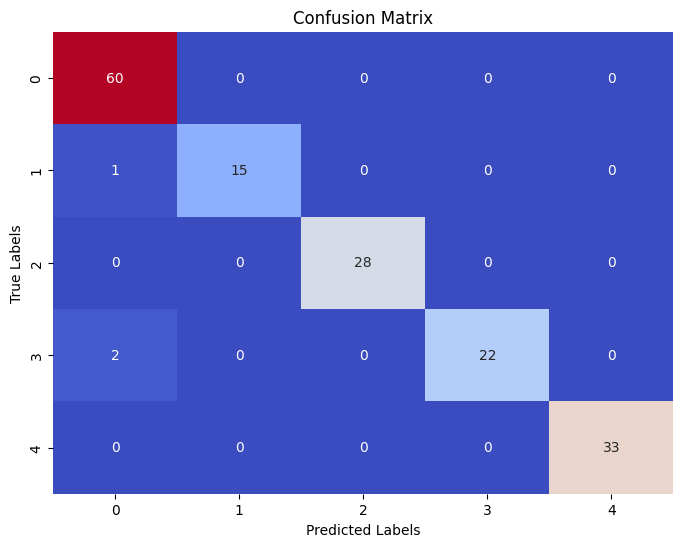

ROC-AUC : 0.9989


In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix,balanced_accuracy_score
 

# Accuracy
accuracy = np.round(balanced_accuracy_score(y_test, y_pred), 4)
print('Accuracy : %0.4f' % accuracy)

# Precision, Recall, F1-Score
# Note: For multi-class problems, we'll need to decide how to average these metrics. Options include: 'micro', 'macro', 'weighted', or 'samples'.
precision = np.round(precision_score(y_test, y_pred, average='weighted'), 4)
recall = np.round(recall_score(y_test, y_pred, average='weighted'), 4)
f1 = np.round(f1_score(y_test, y_pred, average='weighted'), 4)  

print('Precision : %0.4f' % precision)
print('Recall : %0.4f' % recall)
print('F1 : %0.4f' % f1)

# Classification Report
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names= labels))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# ROC-AUC Score
# Since predict_proba gives the probability of each class, the ROC-AUC score calculation needs to be handled carefully for multi-class classification.
# Calculate ROC-AUC for each class and take the average.
roc_auc = roc_auc_score(y_test, pred_prob, average='weighted', multi_class='ovr')
print('ROC-AUC : %0.4f' % roc_auc)

In [36]:
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
cm_df

,BRCA,COAD,KIRC,LUAD,PRAD
BRCA,60,0,0,0,0
COAD,1,15,0,0,0
KIRC,0,0,28,0,0
LUAD,2,0,0,22,0
PRAD,0,0,0,0,33


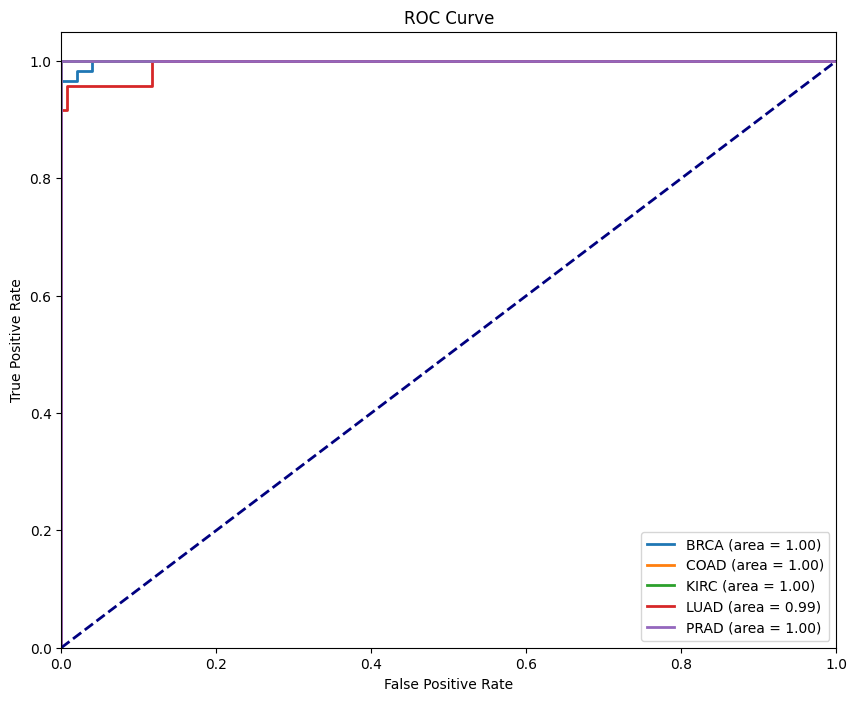

In [39]:
# Plotting the ROC curve
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
y_test_binarized = label_binarize(y_test, classes=classes)
n_classes = len(labels)
fpr = dict()
tpr = dict()
roc_auc = dict()
thresholds = dict()
for i in range(n_classes):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
    roc_auc[i] = auc(fpr[i],tpr[i])

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'{labels[i]} (area = %0.2f)' % roc_auc[i])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

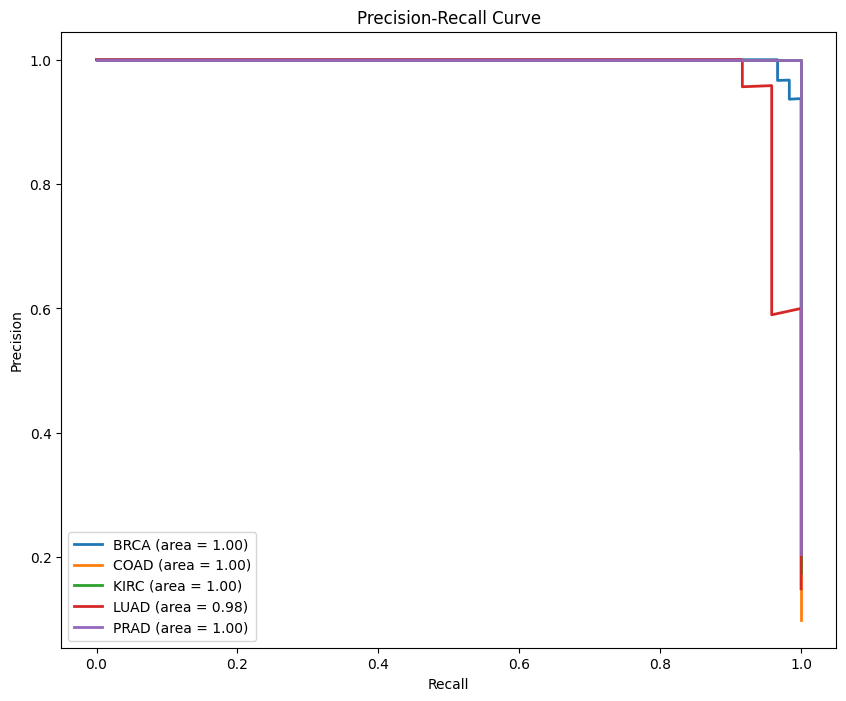

In [40]:
# Precision-Recall Curve
precision = dict()
recall = dict()
pr_auc = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_binarized[:, i], pred_prob[:, i])
    pr_auc[i] = auc(recall[i], precision[i])

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(recall[i], precision[i], lw=2, label=f'{labels[i]} (area = %0.2f)' % pr_auc[i])
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="best")
plt.show()

In [41]:
# Let's try Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
GB = OneVsRestClassifier(GradientBoostingClassifier(random_state=42))

GB.fit(x_train_selected, y_train)
y_pred = GB.predict(x_test_selected)
pred_prob = GB.predict_proba(x_test_selected)

Accuracy : 0.9667
Precision : 0.9820
Recall : 0.9814
F1 : 0.9812
Classification Report:
              precision    recall  f1-score   support

        BRCA       0.98      1.00      0.99        60
        COAD       1.00      0.88      0.93        16
        KIRC       1.00      1.00      1.00        28
        LUAD       0.92      0.96      0.94        24
        PRAD       1.00      1.00      1.00        33

    accuracy                           0.98       161
   macro avg       0.98      0.97      0.97       161
weighted avg       0.98      0.98      0.98       161



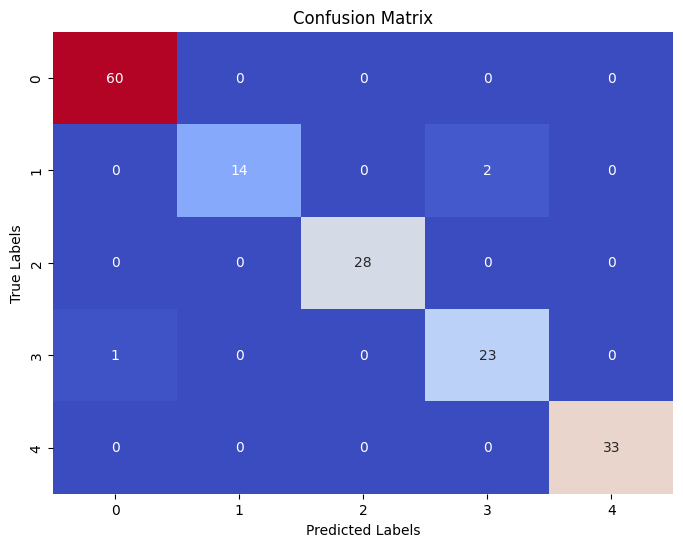

ROC-AUC : 0.9981


In [42]:
# Accuracy
accuracy = np.round(balanced_accuracy_score(y_test, y_pred), 4)
print('Accuracy : %0.4f' % accuracy)

# Precision, Recall, F1-Score
# Note: For multi-class problems, we'll need to decide how to average these metrics. Options include: 'micro', 'macro', 'weighted', or 'samples'.
precision = np.round(precision_score(y_test, y_pred, average='weighted'), 4)
recall = np.round(recall_score(y_test, y_pred, average='weighted'), 4)
f1 = np.round(f1_score(y_test, y_pred, average='weighted'), 4)  

print('Precision : %0.4f' % precision)
print('Recall : %0.4f' % recall)
print('F1 : %0.4f' % f1)

# Classification Report
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names= labels))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# ROC-AUC Score
# Since predict_proba gives the probability of each class, the ROC-AUC score calculation needs to be handled carefully for multi-class classification.
# Calculate ROC-AUC for each class and take the average.
roc_auc = roc_auc_score(y_test, pred_prob, average='weighted', multi_class='ovr')
print('ROC-AUC : %0.4f' % roc_auc)

# Random Foresrt classifier is better than Gradient Boosting Classifier


In [43]:
! pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
  Using cached wheel-0.43.0-py3-none-any.whl.metadata (2.2 kB)
     ---------------------------------------- 0.0/46.2 kB ? eta -:--:--
     ---------------------------------------- 46.2/46.2 kB 2.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/377.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/377.1 MB 1.7 MB/s eta 0:03:37
   ---------------------------------------- 0.2/377.1 MB 1.2 MB/s eta 0:05:07
   ---------------------------------------- 0.2/377.1 MB 1.5 MB/s eta 0:04:08
   ---------------------------------------- 0.3/377.1 MB 1.1 MB/s eta 0:05:36
   ---------------------------------------- 0.4/377.1 MB 1.1 MB/s eta 0:05:56
   ---------------------------------------- 0.5/377.1 MB 1.2 MB/s eta 0:05:21
   ---------------------------------------- 0.5/377.1 MB 1.2 MB/s eta 0:05:20
   ---------------------------------------- 0.6/377.1 MB 1.2 MB/s eta 0:05:26
   ---------

In [ ]:
# Let's CNN model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Define the model
model = Sequential()
model.add(Dense(512, input_dim=x_train_selected.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='relu'))

model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
